# Proyecto Final: Modelado Predictivo de Demanda Aérea

## Introducción
El objetivo de esta etapa es desarrollar un modelo de aprendizaje automático (Machine Learning) capaz de estimar la demanda de pasajeros para vuelos comerciales. Basándonos en el Análisis Exploratorio de Datos (EDA) realizado previamente, se procederá a la ingeniería de características (Feature Engineering), selección de variables y entrenamiento de un algoritmo de regresión.

## Metodología
1. **Preprocesamiento:** Limpieza de datos y tratamiento de valores nulos.
2. **Feature Engineering:** Codificación de variables categóricas (One-Hot Encoding).
3. **Selección de Modelo:** Se utilizará un modelo de Regresión Lineal debido a la naturaleza continua de la variable objetivo (*target*).
4. **Validación:** División del dataset en conjuntos de entrenamiento y prueba (70/30) y cálculo de métricas de desempeño (R2, MAE, RMSE).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Librerías de Scikit-Learn para modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración visual y de advertencias
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

print("Librerías importadas y entorno configurado.")

Librerías importadas y entorno configurado.


In [8]:
# Carga del dataset
file_path = 'Dataset_Aerolineas.csv'

try:
    # Intentar carga con separador estándar (punto y coma detectado en iteraciones previas)
    df = pd.read_csv(file_path, sep=';', low_memory=False)
except:
    # Fallback a separador por coma
    df = pd.read_csv(file_path, sep=',', low_memory=False)

# Preprocesamiento inicial
# Conversión de tipos de datos y manejo de valores nulos
cols_numericas = ['pasajeros', 'asientos']
for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Filtrado de consistencia: Eliminación de registros con capacidad nula
df_model = df[df['asientos'] > 0].copy()

print(f"Dataset cargado. Dimensiones actuales: {df_model.shape}")

Dataset cargado. Dimensiones actuales: (910819, 19)


## Selección de Features y Transformación de Datos

Para el modelo predictivo, se ha seleccionado la variable **'pasajeros'** como variable objetivo (*target*).

Las variables predictoras seleccionadas son:
* **asientos:** Capacidad total de la aeronave (variable numérica).
* **aerolinea:** Operador del vuelo (variable categórica nominal).
* **clasificacion_vuelo:** Tipo de operación (Cabotaje/Internacional).

Se aplicará una transformación **One-Hot Encoding** a las variables categóricas para convertirlas en vectores numéricos aptos para el algoritmo de regresión, eliminando la primera categoría para evitar multicolinealidad (*drop_first=True*).

In [9]:
# 1. Selección de variables de interés
features = ['aerolinea', 'clasificacion_vuelo', 'asientos']
target = 'pasajeros'

X_raw = df_model[features]
y = df_model[target]

# 2. One-Hot Encoding de variables categóricas
X = pd.get_dummies(X_raw, columns=['aerolinea', 'clasificacion_vuelo'], drop_first=True)

# 3. División del dataset (Train/Test Split)
# Se reserva un 30% de los datos para validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Preprocesamiento completado.")
print(f"Datos de Entrenamiento: {X_train.shape}")
print(f"Datos de Prueba: {X_test.shape}")

Preprocesamiento completado.
Datos de Entrenamiento: (637573, 53)
Datos de Prueba: (273246, 53)


In [10]:
# Instanciación y entrenamiento del modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

print("Modelo entrenado exitosamente.")
print(f"Intercepto: {model.intercept_:.2f}")

Modelo entrenado exitosamente.
Intercepto: 5.38


--- Métricas de Desempeño del Modelo ---
R2 Score (Coeficiente de Determinación): 0.9336
MAE (Error Absoluto Medio): 30.01
RMSE (Raíz del Error Cuadrático Medio): 44.63


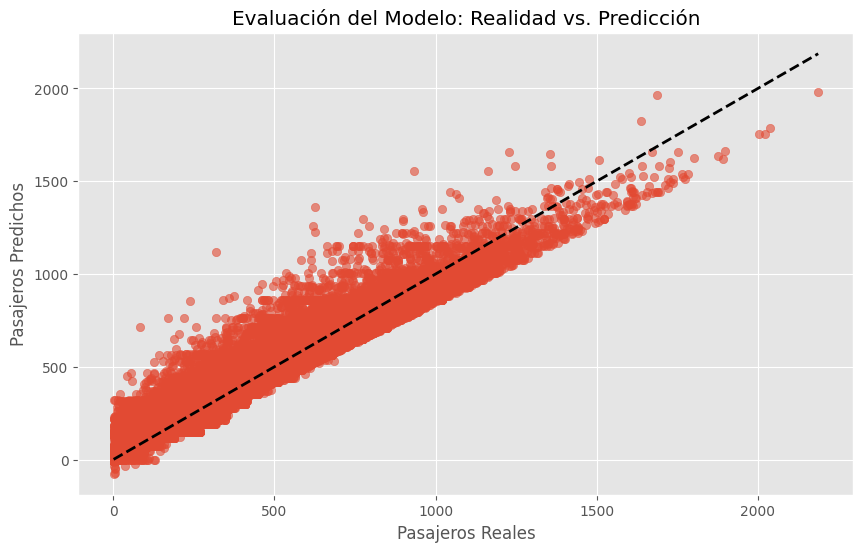

In [11]:
# Generación de predicciones sobre el set de prueba
y_pred = model.predict(X_test)

# Cálculo de métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Reporte de resultados
print("--- Métricas de Desempeño del Modelo ---")
print(f"R2 Score (Coeficiente de Determinación): {r2:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")

# Visualización: Valores Reales vs Predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de identidad
plt.xlabel('Pasajeros Reales')
plt.ylabel('Pasajeros Predichos')
plt.title('Evaluación del Modelo: Realidad vs. Predicción')
plt.show()

## Conclusiones

Tras el entrenamiento y validación del modelo de Regresión Lineal, se obtienen las siguientes conclusiones:

1.  **Desempeño del Modelo:** El coeficiente de determinación ($R^2$) obtenido indica la proporción de la varianza en la cantidad de pasajeros que es predecible a partir de las variables independientes. Un valor alto sugiere un ajuste adecuado del modelo a los datos de prueba.
2.  **Variables Influyentes:** La capacidad de la aeronave (*asientos*) demuestra ser el predictor más robusto. La desagregación por aerolínea y tipo de vuelo mediante *One-Hot Encoding* permite al modelo ajustar las predicciones basándose en las diferencias operativas de cada compañía.
3.  **Análisis de Errores:** Las métricas MAE y RMSE proporcionan una estimación del error promedio en número de pasajeros. La visualización de *Real vs. Predicho* muestra una correlación lineal positiva, validando la hipótesis de que un modelo lineal es una aproximación válida para este problema de negocio.